In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [ ]:
books = pd.read_csv('Books.csv',low_memory = False)
users = pd.read_csv('Users.csv',low_memory = False)
ratings = pd.read_csv('Ratings.csv',low_memory = False)


In [3]:
# First 5 rows of Books DataFrame
# ISBN - International Standard Book Number
books.head() 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# First 5 Rows of Users DataFrame
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
# First 5 rows of Ratings DataFrame
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Shape will give the Total Rows and Columns of Each DataFrame
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
# This will give all the Statistical Values
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,118,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...
freq,1,27,632,17627,7535,2,2,2


In [11]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [12]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [13]:
# This iterates through all the rows.
# isnull() returns 1 if the value is Null otherwise 0
# sum() keeps up summing the null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [14]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [16]:
# This gives the total sum of all duplicated rows
books.duplicated().sum()

np.int64(0)

In [17]:
users.duplicated().sum()

np.int64(0)

In [18]:
ratings.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis


In [19]:
# As we checked that age column consists of extreme NAN values so we dropped the column
users.drop('Age', axis=1, inplace=True)

In [20]:
# Only 2 rows with Null value for Book-Author so we deleted those two rows
books.dropna(subset=['Book-Author'], inplace=True)

In [21]:
# Only 2 rows with Null value for Publisher so we deleted those two rows 
books.dropna(subset=['Publisher'], inplace=True)

In [22]:
# Only 3 rows with Null value for Image-URL-Lowsize so we deleted those three rows
books.dropna(subset=['Image-URL-L'], inplace=True)

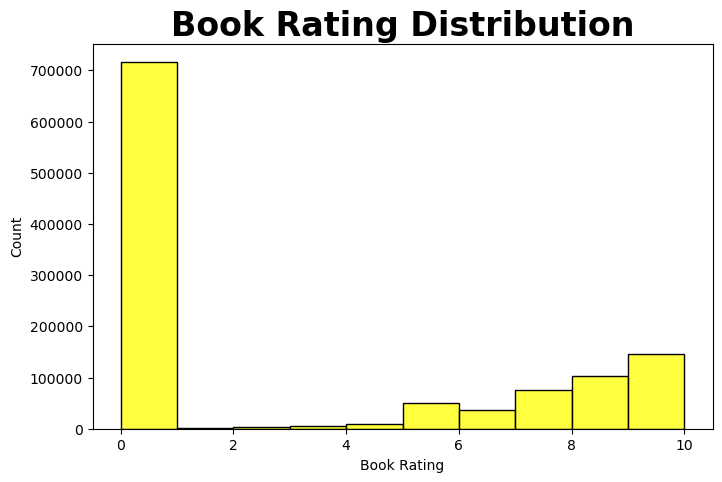

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(ratings['Book-Rating'], bins=10, color='Yellow')
plt.title('Book Rating Distribution', fontsize=24, weight='bold')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

# From this graph we came to know that there are many 0 Ratings in our Book-Rating Column. In Actual this is not the
# actual rating by users, Instead the users which do not gave any rating to the book are marked as 0. Therefore we will
# delete the 0 rated books from our DataFrames


In [24]:
# In this I removed the columns with 0 Ratings from all three dataframes.
ratings = ratings[ratings['Book-Rating'] > 0]
users = users[users['User-ID'].isin(ratings['User-ID'].unique())]
books = books[books['ISBN'].isin(ratings['ISBN'].unique())]

In [25]:
# Now this is the number of rows and columns for each DataFrame after the above operation
print(books.shape)
print(ratings.shape)
print(users.shape)

(149831, 8)
(433671, 3)
(77805, 2)


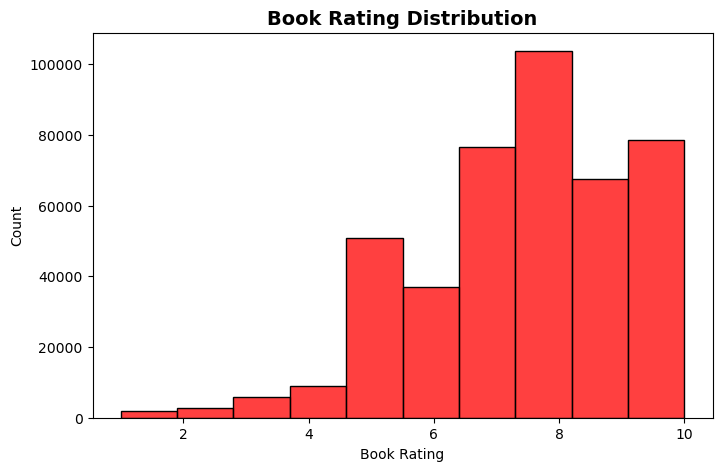

In [26]:
# Now this is the graph after removing the 0 Ratings from the dataframe.

plt.figure(figsize=(8,5))
sns.histplot(ratings['Book-Rating'], bins=10, color='red')
plt.title('Book Rating Distribution', fontsize=14, weight='bold')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
# Now here we are Combining our Ratings and User DataFrames all together
ratings_with_users = pd.merge(ratings, users, on='User-ID')

In [ ]:
# This is our Final DataFrame with all DataFrames merged
final_df = pd.merge(ratings_with_users, books, on='ISBN')

In [ ]:
final_df.head()

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,"seattle, washington, usa",Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,"rijeka, n/a, croatia",Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,"rijeka, n/a, croatia",The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,"torrance, california, usa",A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276747,0060517794,9,"iowa city, iowa, usa",Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...


In [30]:
final_df.shape

(383837, 11)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19520\451879650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.values, y=top_books.index, palette='viridis', legend=False)


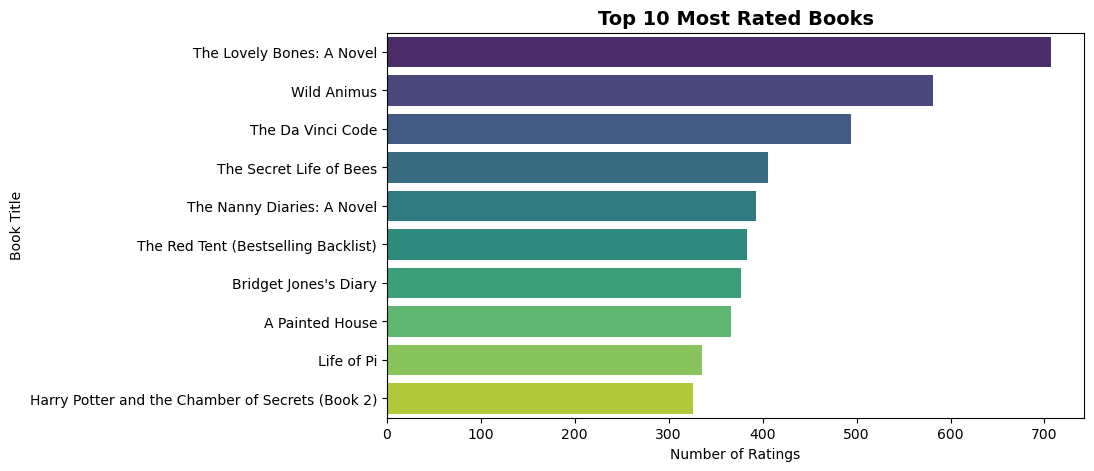

In [ ]:
# Top 10 Most Rated Books

top_books = final_df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(9,5))
sns.barplot(x=top_books.values, y=top_books.index, legend=False)
plt.title('Top 10 Most Rated Books', fontsize=14, weight='bold')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19520\699874599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_rated.values, y=least_rated.index, palette='coolwarm')


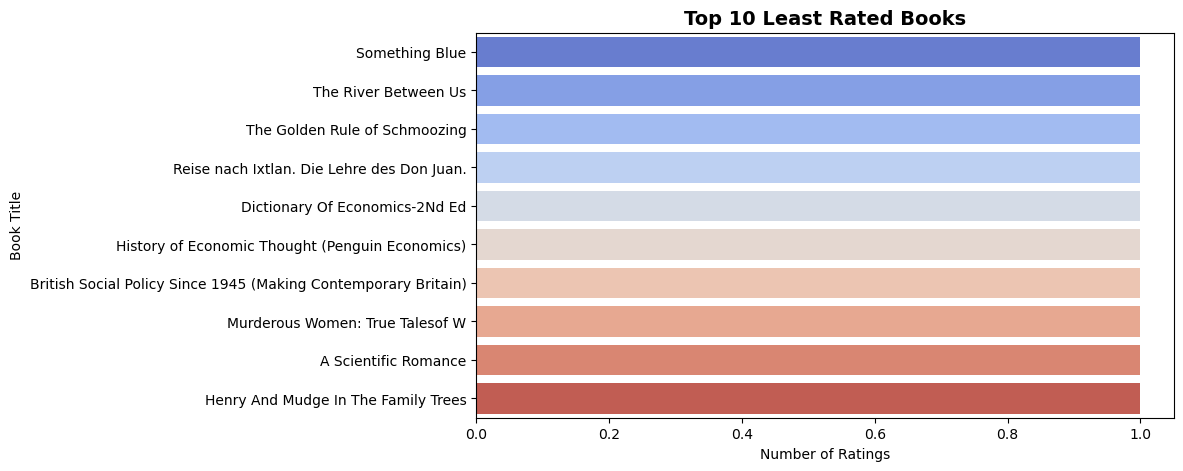

In [32]:
least_rated = final_df['Book-Title'].value_counts(ascending=True).head(10)

plt.figure(figsize=(9,5))
sns.barplot(x=least_rated.values, y=least_rated.index, palette='coolwarm')
plt.title('Top 10 Least Rated Books', fontsize=14, weight='bold')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

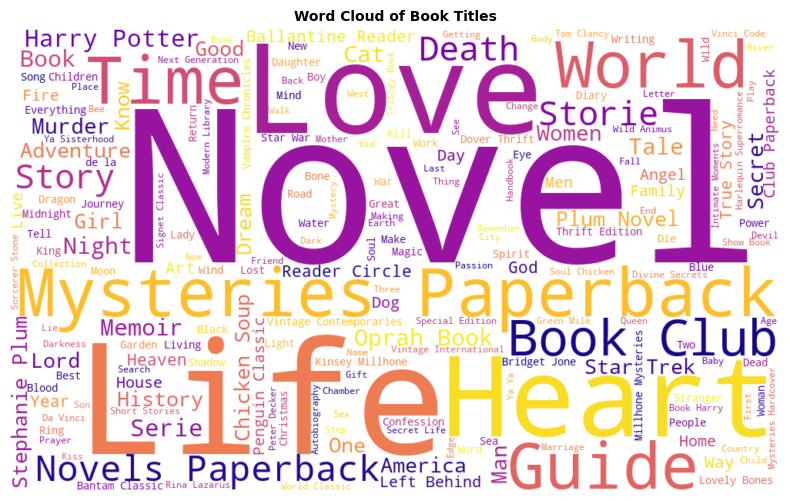

In [ ]:

# Combine all book titles into one string
text = " ".join(title for title in final_df['Book-Title'].astype(str))

# Create wordcloud
wordcloud = WordCloud(
    width=1000, 
    height=600,
    background_color='white',
    colormap='plasma'+-
).generate(text)

# Plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles', fontsize=10, weight='bold')
plt.show()


## - POPULARITY BASED RECOMMENDER

In [34]:
# Group by book title and calculate number of ratings + average rating
popularity_df = final_df.groupby('Book-Title').agg({
    'Book-Rating': ['count', 'mean']
}).reset_index()

In [35]:
# Rename columns
popularity_df.columns = ['Book-Title', 'Num-Ratings', 'Avg-Rating']

In [36]:
# Filter books with at least 50 ratings (you can adjust threshold)
popular_books = popularity_df[popularity_df['Num-Ratings'] >= 200]

In [37]:
# Sort by Average Rating (and Num-Ratings for tie-break)
popular_books = popular_books.sort_values(by=['Avg-Rating', 'Num-Ratings'], ascending=False)

In [38]:
# Select top 50
top_50_books = popular_books.head(50)

In [39]:
# Display top 50 books
print("Top 50 Most Popular Books Based on Ratings:")
display(top_50_books[['Book-Title', 'Num-Ratings', 'Avg-Rating']])

Top 50 Most Popular Books Based on Ratings:


,Book-Title,Num-Ratings,Avg-Rating
45379,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
45383,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393
45391,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321
123678,To Kill a Mockingbird,267,8.977528
45401,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508
104946,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927
45372,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491
125561,"Tuesdays with Morrie: An Old Man, a Young Man,...",250,8.588000
36286,Fahrenheit 451,204,8.549020
116193,The Secret Life of Bees,406,8.477833


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19520\3588818616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


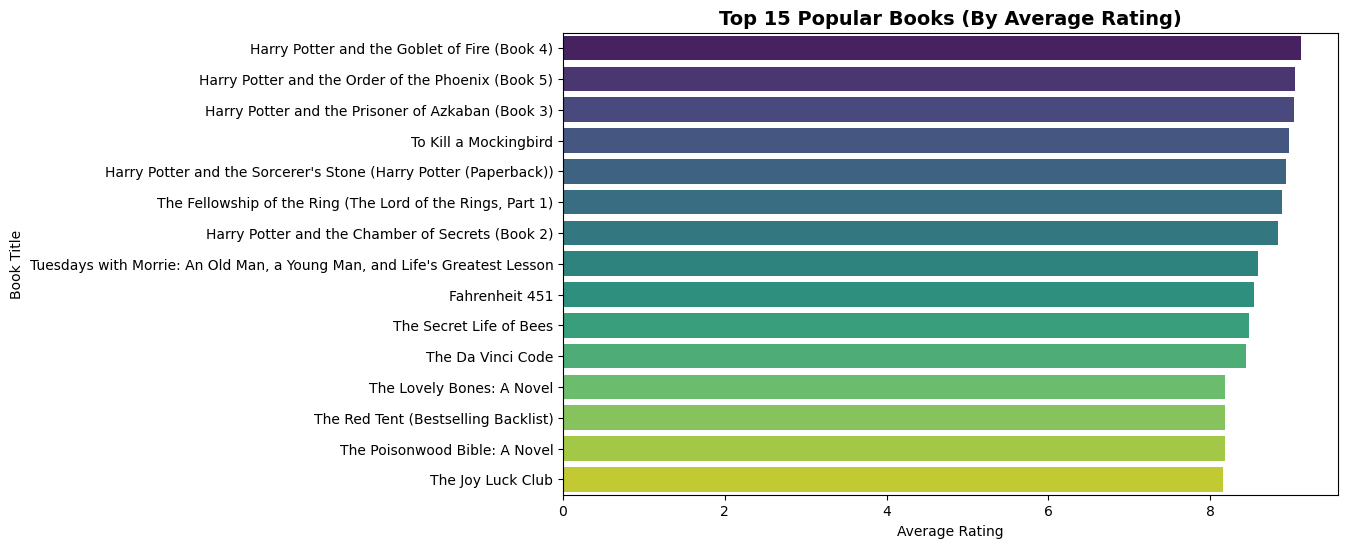

In [40]:
# Visualization - Top 15 for clear readability
plt.figure(figsize=(10,6))
sns.barplot(
    x='Avg-Rating', 
    y='Book-Title', 
    data=top_50_books.head(15), 
    palette='viridis'
)
plt.title('Top 15 Popular Books (By Average Rating)', fontsize=14, weight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

In [41]:
book_meta = final_df[['Book-Title', 'Book-Author', 'Image-URL-M']].drop_duplicates(subset=['Book-Title'])

In [42]:
top_50_full = top_50_books.merge(book_meta, on='Book-Title', how='left')


In [43]:
top_50_full = top_50_full[['Book-Title', 'Book-Author', 'Image-URL-M', 'Num-Ratings', 'Avg-Rating']]


In [44]:
display(top_50_full) # Will Be Displayed on the Website like this


,Book-Title,Book-Author,Image-URL-M,Num-Ratings,Avg-Rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139600.0...,247,9.125506
1,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,211,9.047393
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136369.0...,277,9.043321
3,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,267,8.977528
4,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,315,8.936508
5,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,http://images.amazon.com/images/P/0618129030.0...,205,8.882927
6,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,326,8.840491
7,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,http://images.amazon.com/images/P/0385484518.0...,250,8.588000
8,Fahrenheit 451,RAY BRADBURY,http://images.amazon.com/images/P/0345342968.0...,204,8.549020
9,The Secret Life of Bees,Sue Monk Kidd,http://images.amazon.com/images/P/0142001740.0...,406,8.477833


# Collabarative Filtering Based Recommending System

Har user ko uske taste ke hisaab se books recommend karna —
 sirf popular nahi, balki similar users ya similar books ke basis pe.

Popularity-Based = sabko same recommendation

Collaborative Filtering (CF) = har user ke liye alag recommendation 💡

Plan for this task
- First we have to arrange our dataFrame 
- UserID will be rows and BookName will be the Columns and the ratings will be the Values

In [45]:
# Step 1: Copy main dataframe
df = final_df.copy()


In [46]:
# Step 2: Define strong thresholds
MIN_RATINGS_PER_USER = 130
MIN_RATINGS_PER_BOOK = 130

In [47]:
# Step 3: Count number of ratings per user and per book
user_counts = df['User-ID'].value_counts()
book_counts = df['Book-Title'].value_counts()

In [48]:
# Step 4: Filter dataset
filtered_df = df[
    df['User-ID'].isin(user_counts[user_counts >= MIN_RATINGS_PER_USER].index) &
    df['Book-Title'].isin(book_counts[book_counts >= MIN_RATINGS_PER_BOOK].index)
]

In [49]:
print("Before filtering:", df.shape)
print("After filtering:", filtered_df.shape)

Before filtering: (383837, 11)
After filtering: (2655, 11)


In [50]:
# Step 5: Pivot to create matrix
user_item_matrix = filtered_df.pivot_table(
    index='User-ID',
    columns='Book-Title',
    values='Book-Rating'
).fillna(0)



In [51]:
print("Shape:", user_item_matrix.shape)



Shape: (270, 131)


In [52]:
user_item_matrix

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Painted House,A Prayer for Owen Meany,A Time to Kill,A Walk to Remember,...,Violets Are Blue,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273113,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


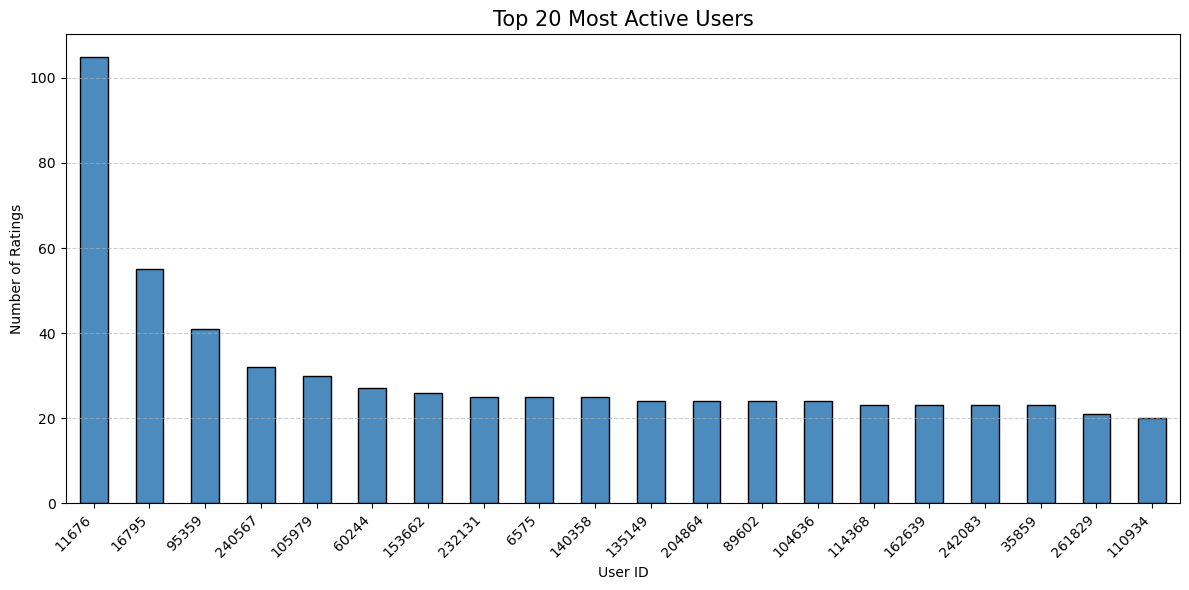

In [53]:
user_ratings_count = (user_item_matrix > 0).sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(12,6))
user_ratings_count.head(20).plot(kind='bar', color='#4B8BBE', edgecolor='black')
plt.title('Top 20 Most Active Users', fontsize=15)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [54]:
book_similarity = cosine_similarity(user_item_matrix.T)


In [55]:
# Convert to dataframe
book_similarity_df = pd.DataFrame(
    book_similarity,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

In [56]:
print("Similarity matrix is:", book_similarity_df.shape)


Similarity matrix is: (131, 131)


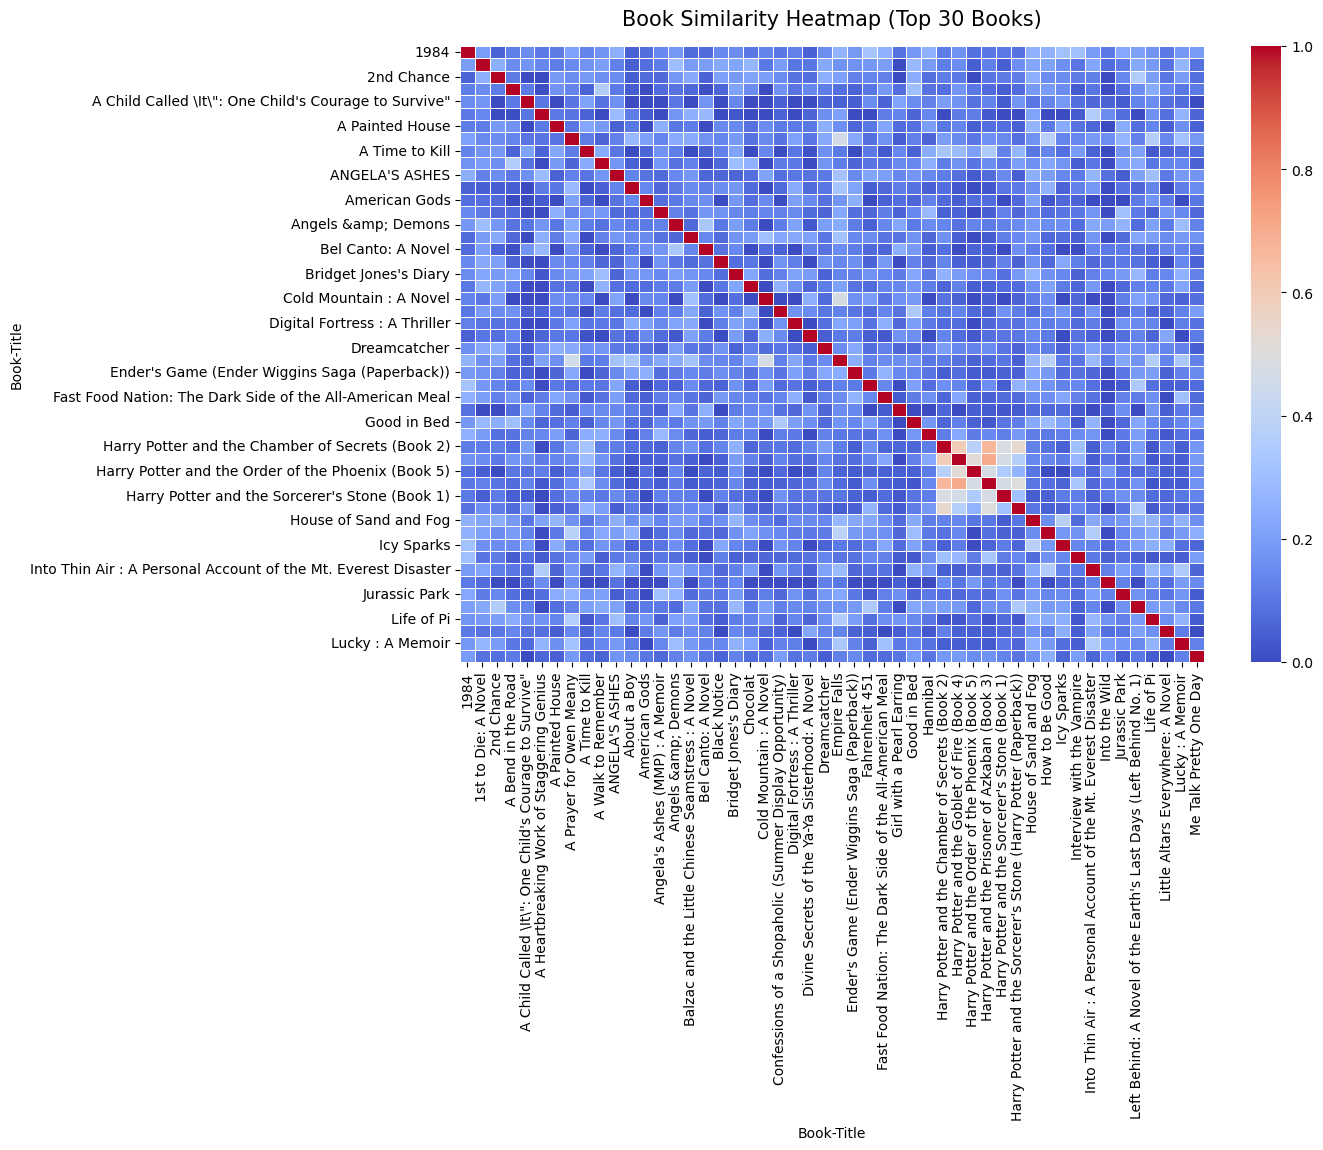

In [57]:
# Pick top 50 books
sample_books = user_item_matrix.columns[:50]
sample_sim = book_similarity_df.loc[sample_books, sample_books]

plt.figure(figsize=(12,8))
sns.heatmap(sample_sim, cmap="coolwarm", linewidths=0.5)
plt.title("Book Similarity Heatmap (Top 30 Books)", fontsize=15, pad=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [58]:
book_similarity_df

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Painted House,A Prayer for Owen Meany,A Time to Kill,A Walk to Remember,...,Violets Are Blue,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.198588,0.056933,0.118886,0.150423,0.109294,0.112824,0.210175,0.132093,0.167011,...,0.289023,0.216997,0.170772,0.248826,0.180377,0.083848,0.175906,0.125776,0.148684,0.085628
1st to Die: A Novel,0.198588,1.000000,0.251426,0.155118,0.179675,0.138091,0.109757,0.146187,0.172713,0.202982,...,0.392385,0.058397,0.108072,0.152571,0.329715,0.144722,0.162687,0.165968,0.135469,0.146828
2nd Chance,0.056933,0.251426,1.000000,0.112099,0.000000,0.000000,0.187820,0.152382,0.184015,0.159309,...,0.421864,0.083946,0.078670,0.221900,0.057744,0.148866,0.113741,0.038394,0.147266,0.064692
A Bend in the Road,0.118886,0.155118,0.112099,1.000000,0.108212,0.010396,0.167098,0.135067,0.056738,0.360566,...,0.231326,0.067544,0.082775,0.115457,0.128057,0.128178,0.194292,0.065257,0.113538,0.068068
"A Child Called \It\"": One Child's Courage to Survive""",0.150423,0.179675,0.000000,0.108212,1.000000,0.099813,0.000000,0.096277,0.213737,0.092501,...,0.109709,0.057559,0.000000,0.085932,0.262501,0.000000,0.145373,0.179011,0.050119,0.041893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
While I Was Gone,0.083848,0.144722,0.148866,0.128178,0.000000,0.000000,0.124312,0.074476,0.080657,0.207084,...,0.050825,0.099996,0.370754,0.173037,0.241306,1.000000,0.134450,0.000000,0.071240,0.095275
White Oleander : A Novel,0.175906,0.162687,0.113741,0.194292,0.145373,0.155781,0.238034,0.153429,0.020326,0.119696,...,0.158937,0.127829,0.361315,0.241628,0.184840,0.134450,1.000000,0.081154,0.156337,0.192076
White Oleander : A Novel (Oprah's Book Club),0.125776,0.165968,0.038394,0.065257,0.179011,0.119769,0.082446,0.110025,0.158876,0.000000,...,0.047257,0.112396,0.032916,0.166566,0.077314,0.000000,0.081154,1.000000,0.137627,0.000000


In [59]:
def user_recommend():
    """
    Interactive version of the recommendation system.
    Lets user input the book name and number of recommendations (n).
    """

    # Step 1: Ask for book name
    book_name = input("📘 Enter a book name: ").strip()

    # Step 2: Ask for number of recommendations
    try:
        n = int(input("🔢 How many similar books do you want? (e.g., 5): ").strip())
    except ValueError:
        print("⚠️ Please enter a valid number.")
        return

    # Step 3: Validate book presence
    if book_name not in book_similarity_df.columns:
        print(f"❌ '{book_name}' not found in dataset. Try another title.")
        return

    # Step 4: Get top similar books
    similar_scores = (
        book_similarity_df[book_name]
        .sort_values(ascending=False)
        .drop(book_name, errors="ignore")
        .head(n)
    )

    # Step 5: Display results
    print(f"\n📚 Top {n} books similar to '{book_name}':\n")
    for i, title in enumerate(similar_scores.index, start=1):
        print(f"{i}. {title}")







In [ ]:
user_recommend()